In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2
import matplotlib.pyplot as plt

In [11]:
image = cv2.imread('C:\\Users\\Khatija Begum\\Desktop\\Image\\Beautiful-cat.jpg')

In [12]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

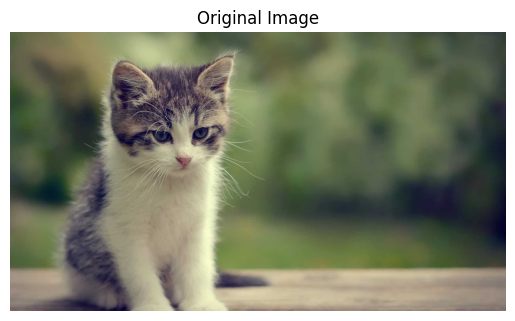

In [13]:
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

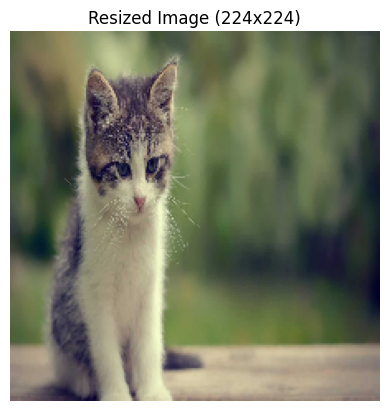

In [14]:
resized_image = cv2.resize(image, (224, 224))
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title("Resized Image (224x224)")
plt.axis('off')
plt.show()

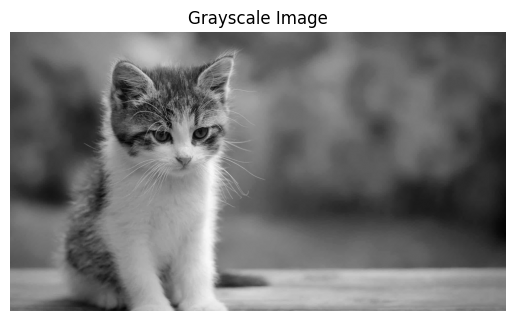

In [15]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

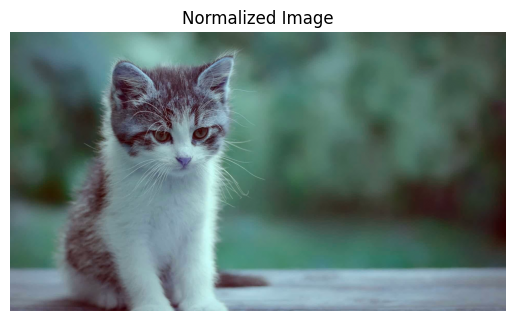

In [16]:
normalized = image / 255.0
plt.imshow(normalized)
plt.title("Normalized Image")
plt.axis('off')
plt.show()

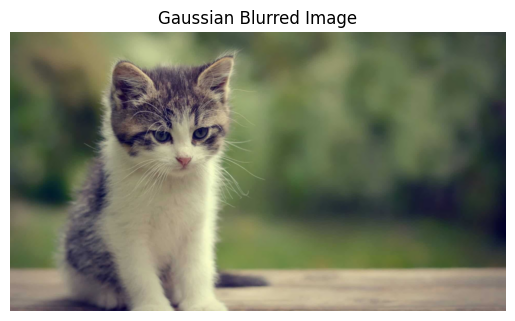

In [17]:
blurred = cv2.GaussianBlur(image, (5, 5), 0)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blurred Image")
plt.axis('off')
plt.show()

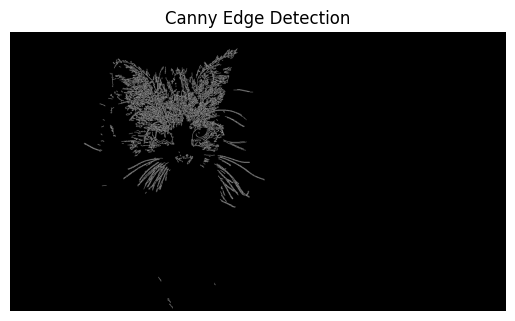

In [18]:
edges = cv2.Canny(gray_image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()

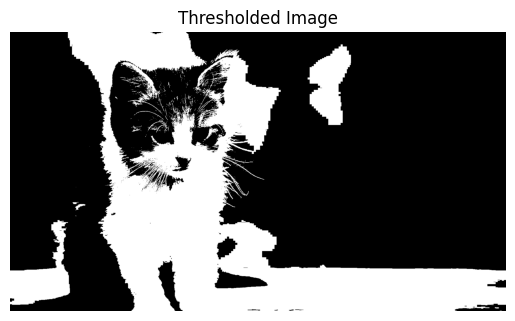

In [19]:
ret, thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.title("Thresholded Image")
plt.axis('off')
plt.show()

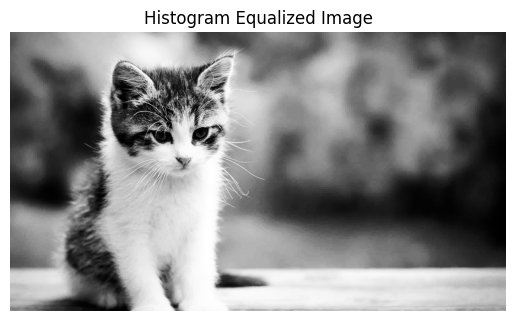

In [20]:
equalized = cv2.equalizeHist(gray_image)
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis('off')
plt.show()

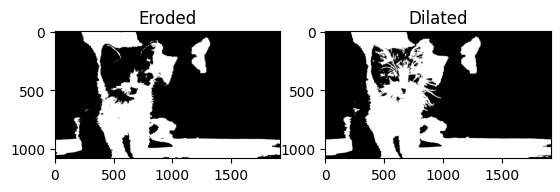

In [21]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

eroded = cv2.erode(thresh, kernel, iterations=1)
dilated = cv2.dilate(thresh, kernel, iterations=1)

plt.subplot(1,2,1), plt.imshow(eroded, cmap='gray'), plt.title('Eroded')
plt.subplot(1,2,2), plt.imshow(dilated, cmap='gray'), plt.title('Dilated')
plt.show()

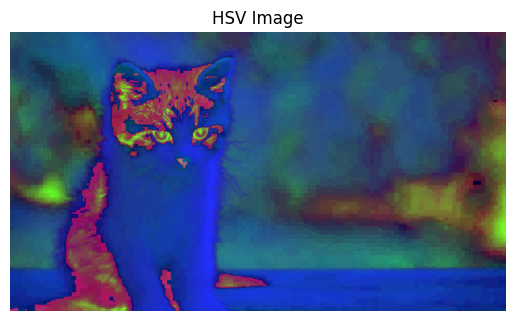

In [22]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_image)
plt.title("HSV Image")
plt.axis('off')
plt.show()

In [26]:
pip install tensorflow

     ---------------------------------------- 0.0/331.7 MB ? eta -:--:--
     ---------------------------------------- 0.1/331.7 MB 1.7 MB/s eta 0:03:21
     ---------------------------------------- 0.2/331.7 MB 3.1 MB/s eta 0:01:46
     ---------------------------------------- 0.5/331.7 MB 4.3 MB/s eta 0:01:17
     ---------------------------------------- 1.2/331.7 MB 7.6 MB/s eta 0:00:44
     --------------------------------------- 3.2/331.7 MB 15.6 MB/s eta 0:00:22
      -------------------------------------- 5.7/331.7 MB 22.9 MB/s eta 0:00:15
      -------------------------------------- 8.4/331.7 MB 28.3 MB/s eta 0:00:12
     - ------------------------------------ 11.3/331.7 MB 59.5 MB/s eta 0:00:06
     - ------------------------------------ 14.0/331.7 MB 65.6 MB/s eta 0:00:05
     - ------------------------------------ 16.6/331.7 MB 72.6 MB/s eta 0:00:05
     -- ----------------------------------- 18.9/331.7 MB 65.6 MB/s eta 0:00:05
     -- ----------------------------------- 21.


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\Khatija Begum\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Khatija Begum\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Khatija Begum\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.1 at

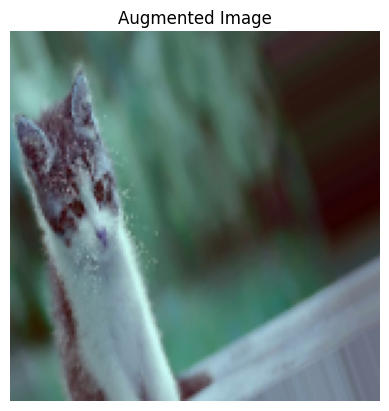

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)

img_array = cv2.resize(image, (150,150))  # Resize for augmentation
img_array = np.expand_dims(img_array, 0)

aug_iter = datagen.flow(img_array)
aug_image = next(aug_iter)[0].astype(np.uint8)

plt.imshow(aug_image)
plt.title("Augmented Image")
plt.axis('off')
plt.show()

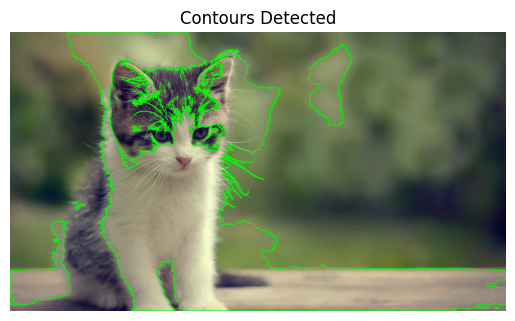

In [28]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_copy = image.copy()
cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
plt.title("Contours Detected")
plt.axis('off')
plt.show()

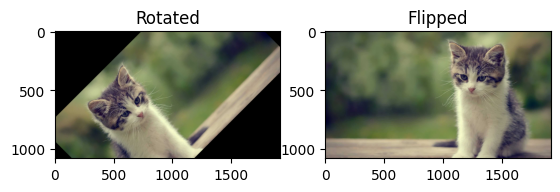

In [29]:
# Rotate
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))

# Flip
flipped = cv2.flip(image, 1)  # Horizontal flip

plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)), plt.title("Rotated")
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB)), plt.title("Flipped")
plt.show()

In [31]:
pip install gradio

     ---------------------------------------- 0.0/60.4 MB ? eta -:--:--
     ---------------------------------------- 0.1/60.4 MB 2.6 MB/s eta 0:00:24
     ---------------------------------------- 0.2/60.4 MB 3.4 MB/s eta 0:00:18
     ---------------------------------------- 0.5/60.4 MB 4.5 MB/s eta 0:00:14
      --------------------------------------- 1.4/60.4 MB 8.7 MB/s eta 0:00:07
     - -------------------------------------- 2.8/60.4 MB 14.9 MB/s eta 0:00:04
     --- ------------------------------------ 5.8/60.4 MB 24.5 MB/s eta 0:00:03
     ----- ---------------------------------- 8.1/60.4 MB 28.7 MB/s eta 0:00:02
     ------- ------------------------------- 11.4/60.4 MB 59.5 MB/s eta 0:00:01
     --------- ----------------------------- 14.9/60.4 MB 65.6 MB/s eta 0:00:01
     ----------- --------------------------- 17.8/60.4 MB 65.6 MB/s eta 0:00:01
     ------------- ------------------------- 20.5/60.4 MB 65.6 MB/s eta 0:00:01
     --------------- ----------------------- 23.5/60


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import gradio as gr

def preprocess_demo(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    resized = cv2.resize(img, (224, 224))
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(resized, (5,5), 0)
    canny = cv2.Canny(gray, 100, 200)
    
    return [resized, gray, blur, canny]

gr.Interface(
    fn=preprocess_demo,
    inputs=gr.Image(type="numpy"),
    outputs=[
        gr.Image(label="Resized"),
        gr.Image(label="Grayscale"),
        gr.Image(label="Blurred"),
        gr.Image(label="Canny Edge"),
    ],
    title="CV Preprocessing Demo"
).launch()

c:\Users\Khatija Begum\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


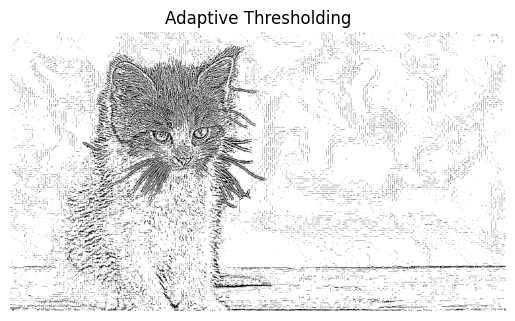

In [34]:
adaptive_thresh = cv2.adaptiveThreshold(
    gray_image, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    11, 2
)

plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive Thresholding")
plt.axis('off')
plt.show()

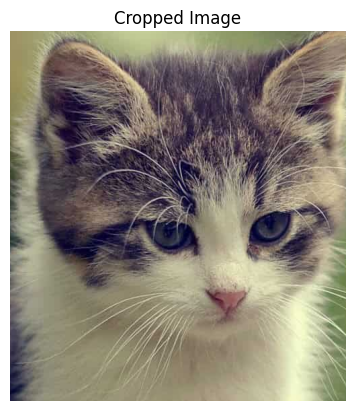

In [49]:
cropped = image[100:650, 350:850]  # [y1:y2, x1:x2]
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.title("Cropped Image")
plt.axis('off')
plt.show()

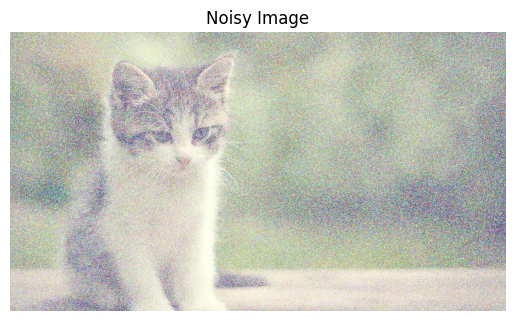

In [50]:
import numpy as np

noise = np.random.normal(0, 25, image.shape).astype(np.uint8)
noisy_img = cv2.add(image, noise)

plt.imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image")
plt.axis('off')
plt.show()

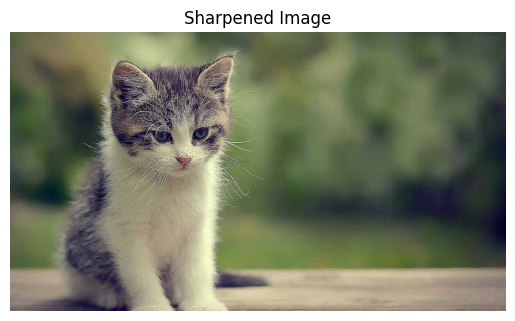

In [51]:
sharpen_kernel = np.array([[-1, -1, -1],
                           [-1,  9, -1],
                           [-1, -1, -1]])
sharpened = cv2.filter2D(image, -1, sharpen_kernel)

plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
plt.title("Sharpened Image")
plt.axis('off')
plt.show()

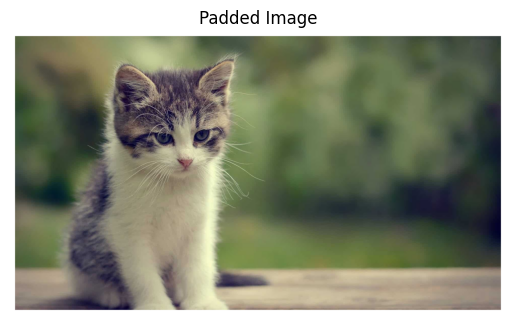

In [52]:
padded = cv2.copyMakeBorder(image, 20, 20, 20, 20, cv2.BORDER_CONSTANT, value=[255,255,255])
plt.imshow(cv2.cvtColor(padded, cv2.COLOR_BGR2RGB))
plt.title("Padded Image")
plt.axis('off')
plt.show()

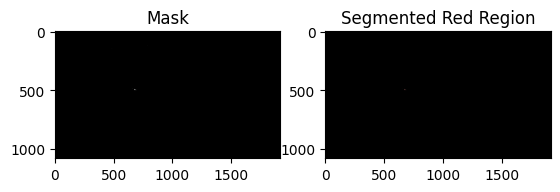

In [53]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_red = np.array([0, 100, 100])
upper_red = np.array([10, 255, 255])
mask = cv2.inRange(hsv, lower_red, upper_red)
result = cv2.bitwise_and(image, image, mask=mask)

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Segmented Red Region")
plt.show()